In [55]:
#imports 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#some utility functions; showsurf for 3d plotting, organize lets you orient a curve from unordered contour indeces

def showsurf(surface, ls=False):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(0, surface.shape[1]-1, surface.shape[1])
    y = np.linspace(0, surface.shape[0]-1, surface.shape[0])

    X,Y = np.meshgrid(x,y)
    
    if not ls:
        ax.plot_surface(X,Y,surface)
    if ls:
        ax.contour(X,Y,surface, [0])

def organize(c):
    c.sort(key = lambda x: x[0])
    ordered = []
    ordered.append(c[0])
    c.remove(ordered[0])
    
    d = lambda x,y: ((x[0]-y[0])**2+(x[1]-y[1])**2)
    
    while(len(c)> 0):
        c.sort(key=lambda x: d(x,ordered[-1]))
        ordered.append(c[0])
        c.remove(ordered[-1])
    
    #check orientation
    if ordered[0][1]<ordered[1][1]:
        ordered.reverse()
    
    return ordered

In [13]:
#two alternative curvature functions, different convention (thank stack), i find "mean_curvature" more robust 

def k(s):
    '''
    curvature given as divergence of the unit normal 
    
    '''
    sy, sx = np.gradient(s)
    norm = (sx**2 + sy**2)**0.5
    nx = sx/(norm+0.00001)
    ny = sy/(norm+0.00001)
    
    nxy, nxx = np.gradient(nx)
    nyy, nyx = np.gradient(ny)
    
    return nxx+nyy

def mean_curvature(Z, step=1):
    '''
    step denotes spacing on grid vals 
    '''
    Zy, Zx  = np.gradient(Z)
    Zxy, Zxx = np.gradient(Zx)
    Zyy, _ = np.gradient(Zy)

    H = (Zx**2 + step)*Zyy - 2*Zx*Zy*Zxy + (Zy**2 + step)*Zxx
    H = -H/(2*(Zx**2 + Zy**2 + step)**(1.5))

    return H


Text(0.5, 1.0, 'curvature')

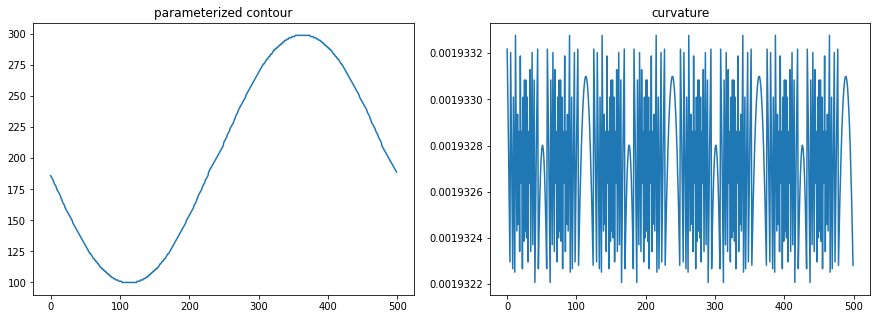

In [28]:
#first look at the level set of a parabloid (a circle).  Wanna make sure curvature relatively constant

#generate surface
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)
xx, yy = np.meshgrid(x,y)
surface1 = -(xx**2+yy**2)+1

#compute curvature
s=mean_curvature(surface1, step=0.01)

#------Just some stuff to generate an oriented plot w/ curvature along each point of contour-------#
#find zero level set indeces
indeces = list(zip(*np.where(abs(surface1)<0.008)))
o = organize(indeces)
ks = [s[item] for item in o]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,5))
ax1.plot([i[1] for i in o])
ax1.set_title('parameterized contour')
ax2.plot(ks)
ax2.set_title('curvature')

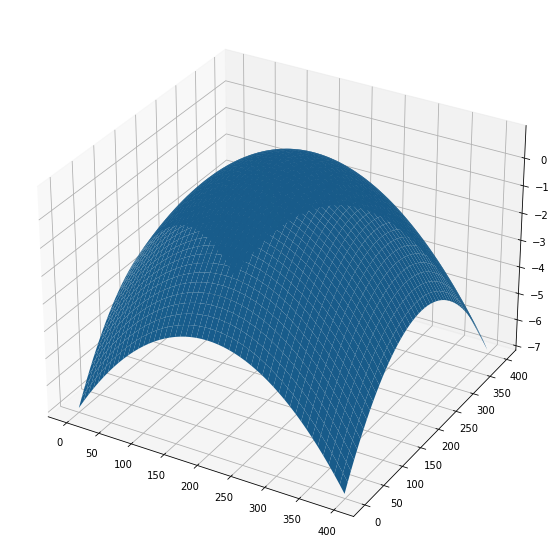

In [19]:
showsurf(surface1, ls=False)

In [20]:
def iteration(surface, dt=0.001, alpha = 1, step=1):
    d = lambda x,y: (x**2 + y**2)**0.5
    
    sy, sx = np.gradient(surface)
    nx = sx/(d(sx,sy)+0.0001)
    ny = sy/(d(sx,sy)+0.0001)

    K = mean_curvature(surface, step)

    surface = surface - alpha*K*d(sx,sy)*dt
        
    return surface


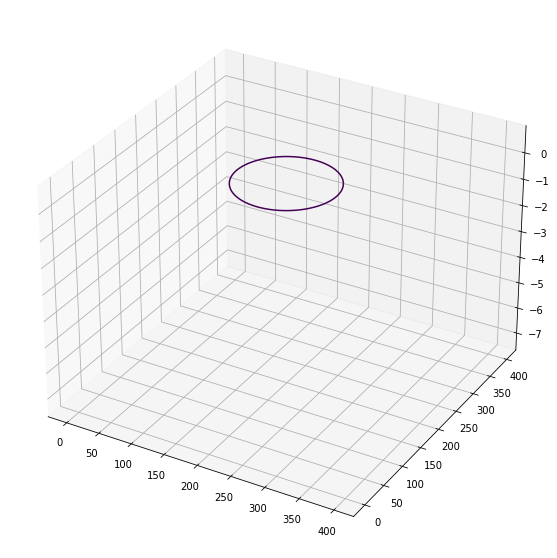

In [27]:
#run a sample iteration using a parabloid as initial surface 

g1 = surface1

#note i'm using an alpha thats ad hoc, step was computed using grid mesh size from parabloid def
for i in range(3500):
    g1 = iteration(g1, dt=0.001, alpha=4000, step=0.01)
    
showsurf(g1, ls=True)

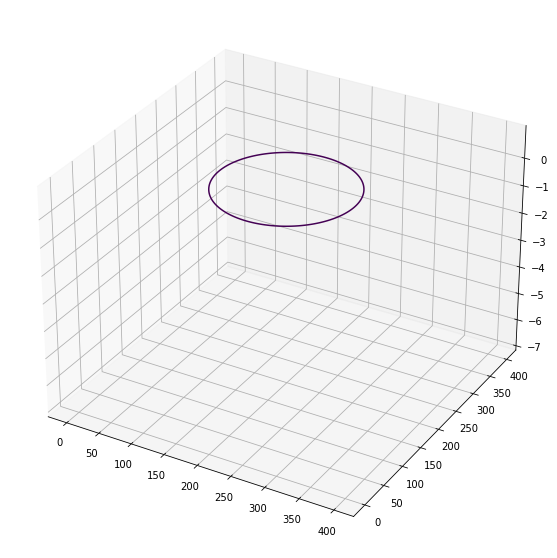

In [25]:
#notice how iterate is converging inwards, here's the original for reference 
showsurf(surface1, ls=True)

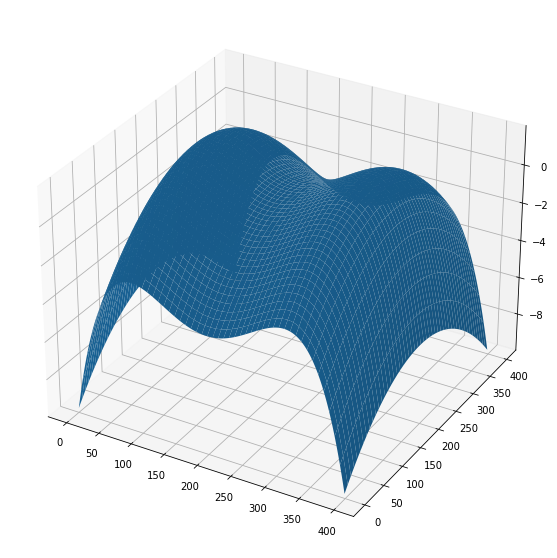

In [40]:
#now try with an hourglass looking thing
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)
xx, yy = np.meshgrid(x,y)
surface2 = -((xx+0.5)*(xx+1.5)*(xx-0.5)*(xx-1.5)+yy**2)+0.8

showsurf(surface2)

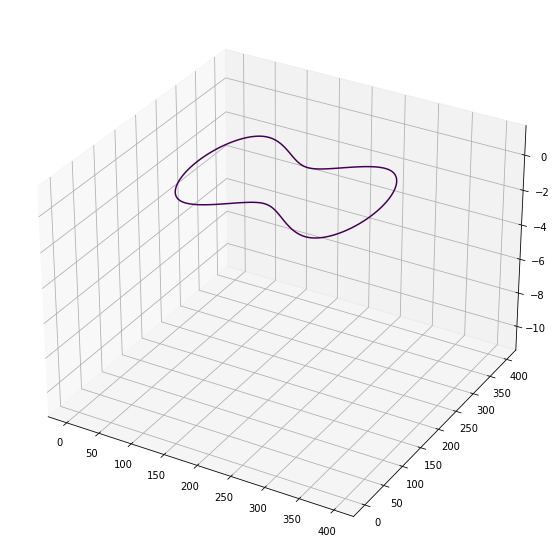

In [39]:
g2 = surface2

for i in range(2500):
    g2 = iteration(g2, dt=0.001, alpha=2000, step=0.01)
    
showsurf(g2, ls=True)

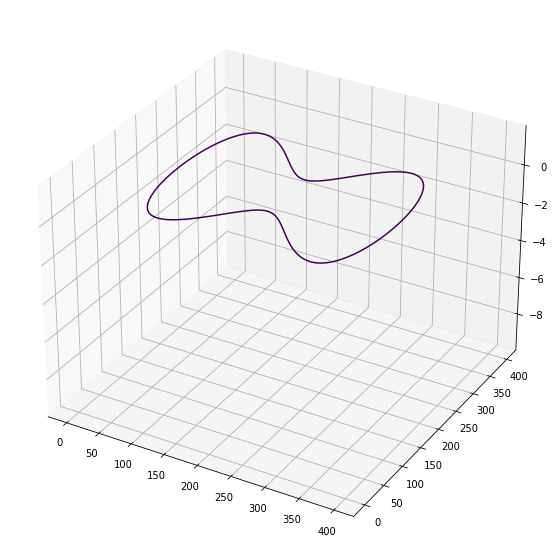

In [36]:
#original 
showsurf(surface2, ls=True)

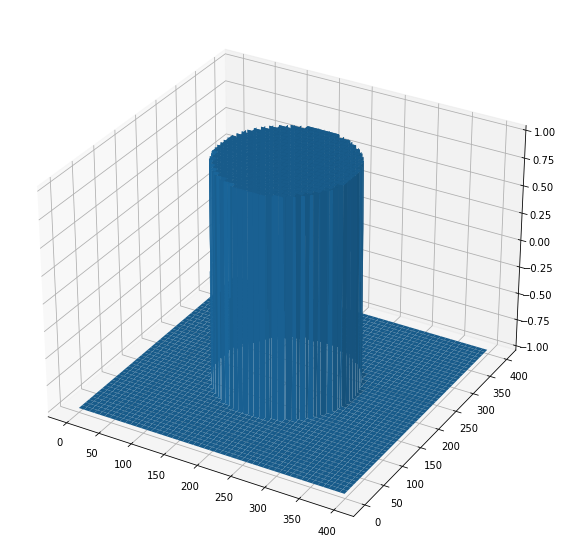

In [43]:
#now revisit the original level set but using different surface --> cylinder 
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)
xx, yy = np.meshgrid(x,y)

surface3 = -(xx**2+yy**2)+1  #same as parabloid 

#now do some whack stuff to make it a cylinder
indeces = list(zip(*np.where(abs(surface1)<0.008)))

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        if (i,j) in indeces:
            pass
        elif -(xx[i,j]**2+yy[i,j]**2)+1>0:
            surface3[i,j] = 1
        else:
            surface3[i,j] = -1
            

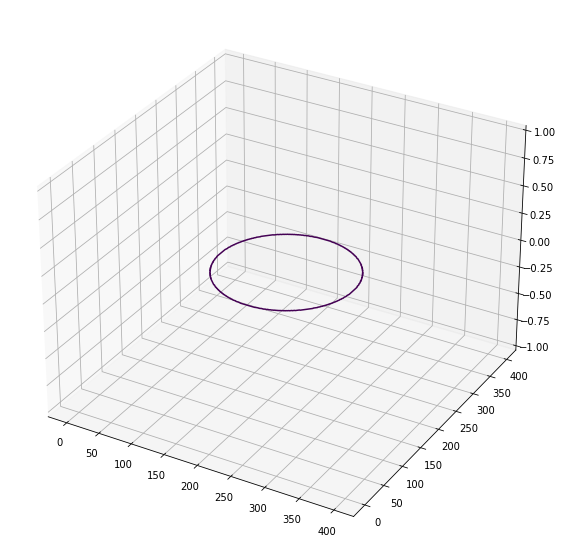

In [44]:
#now we plot the surface
showsurf(surface3, ls=True)

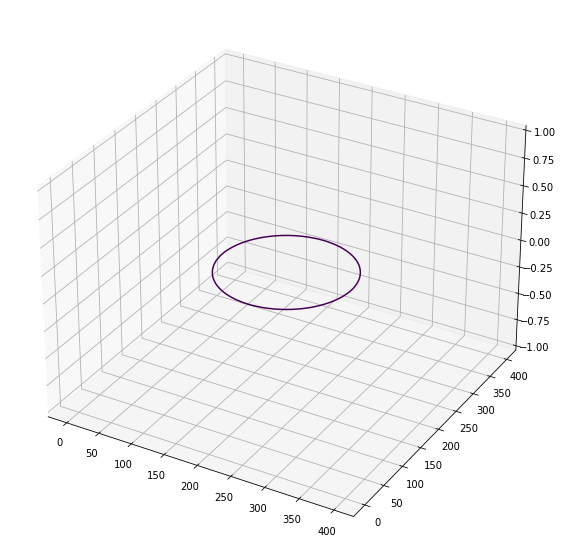

In [54]:
g3 = surface3

for i in range(500):
    g3 = iteration(g3, dt=0.001, alpha=2500, step=0.01)
    
showsurf(g3, ls=True)

#okay so apparently this surface works as well!